In [1]:
import wandb
import pandas as pd

run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

wandb: Currently logged in as: seulgie (seulgie-udacity). Use `wandb login --relogin` to force relogin


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check the first few rows of the dataset
print(df.head())

         id                                               name    host_id  \
0   9138664                Private Lg Room 15 min to Manhattan   47594947   
1  31444015  TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...    8523790   
2   8741020  Voted #1 Location Quintessential 1BR W Village...   45854238   
3  34602077  Spacious 1 bedroom apartment 15min from Manhattan  261055465   
4  23203149   Big beautiful bedroom in huge Bushwick apartment     143460   

  host_name neighbourhood_group   neighbourhood  latitude  longitude  \
0      Iris              Queens       Sunnyside  40.74271  -73.92493   
1    Johlex           Manhattan  Hell's Kitchen  40.76682  -73.98878   
2      John           Manhattan    West Village  40.73631  -74.00611   
3     Regan              Queens         Astoria  40.76424  -73.92351   
4     Megan            Brooklyn        Bushwick  40.69839  -73.92044   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     74   

In [15]:
# 2. Check for missing values in the dataset
print(df.isnull().sum())

id                                   0
name                                 7
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4123
reviews_per_month                 4123
calculated_host_listings_count       0
availability_365                     0
dtype: int64


In [16]:
# 3. Basic descriptive statistics for numerical columns
print(df.describe())

                 id       host_id      latitude     longitude         price  \
count  2.000000e+04  2.000000e+04  20000.000000  20000.000000  20000.000000   
mean   1.892380e+07  6.746034e+07     40.728455    -73.952125    153.269050   
std    1.101223e+07  7.857936e+07      0.054755      0.046559    243.325609   
min    2.539000e+03  2.571000e+03     40.508730    -74.239140      0.000000   
25%    9.393540e+06  7.853718e+06     40.689420    -73.983030     69.000000   
50%    1.952117e+07  3.111431e+07     40.722730    -73.955640    105.000000   
75%    2.912936e+07  1.068426e+08     40.762990    -73.936380    175.000000   
max    3.648561e+07  2.742733e+08     40.913060    -73.717950  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    20000.000000       20000.000000       15877.000000   
mean         6.992100          23.274100           1.377446   
std         21.645449          44.927793           1.683006   
min          1.000000           0.00

In [17]:
# 4. Check the data types of all columns
print(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


ValueError: num must be an integer with 1 <= num <= 9, not 10

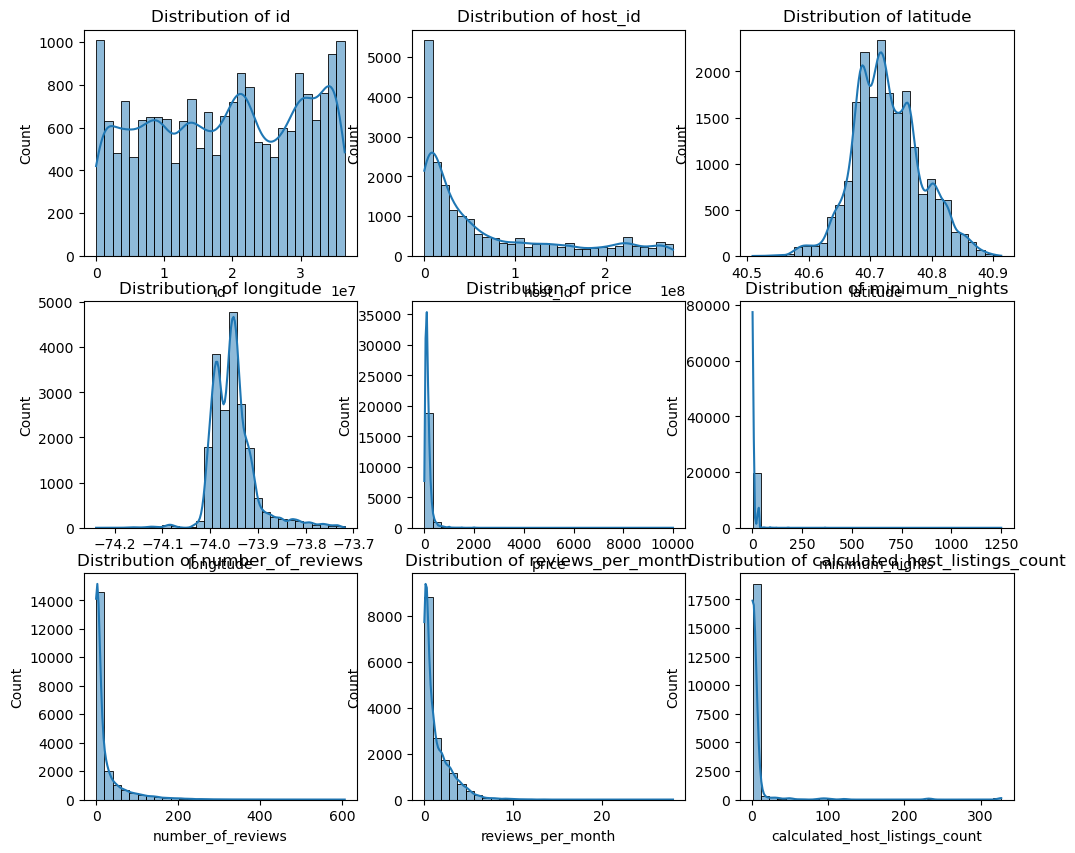

In [19]:
# 6. Visualize distributions of numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

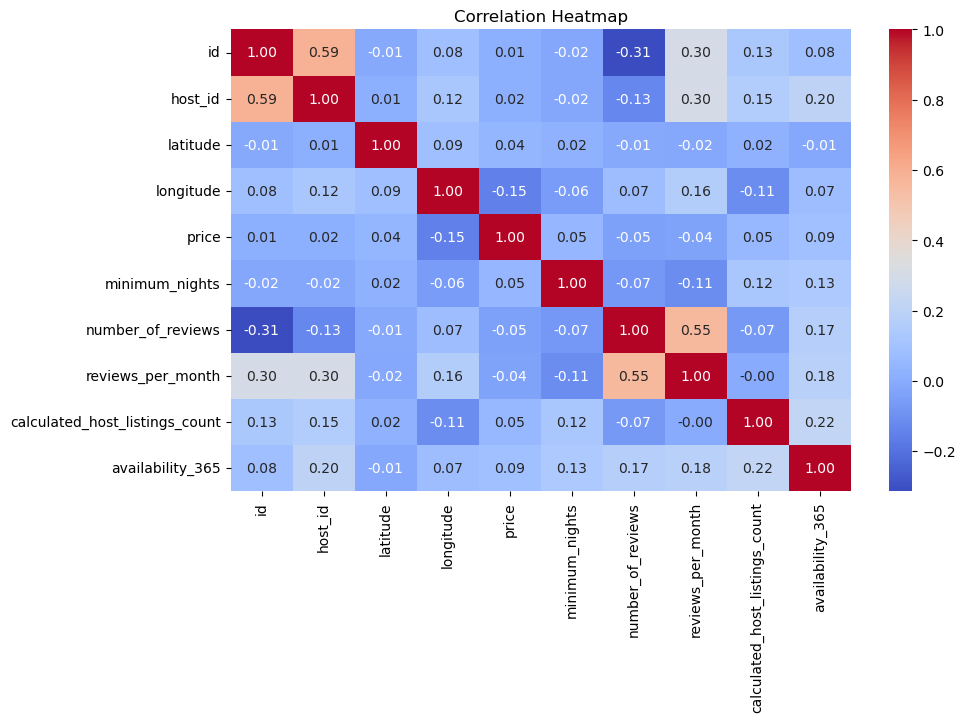

In [20]:
# 7. Visualize correlations between numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
# 8. Check for unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f'{col}: {df[col].nunique()} unique values')

name: 19768 unique values
host_name: 6517 unique values
neighbourhood_group: 5 unique values
neighbourhood: 217 unique values
room_type: 3 unique values
last_review: 1507 unique values


In [23]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  number_

In [25]:
run.finish()